#### Import Library

In [2]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

#### Load Data

In [3]:
df = pd.read_csv("dataset/Fish.csv")
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


#### EDA & Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# cek missing value
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [10]:
# cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [25]:
# drop kolom species (tidak dibutuhkan)
df.drop(columns=['Species'], inplace=True)
df.head(3)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961


#### Asumsi Analisis Regresi
Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Normalitas
Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

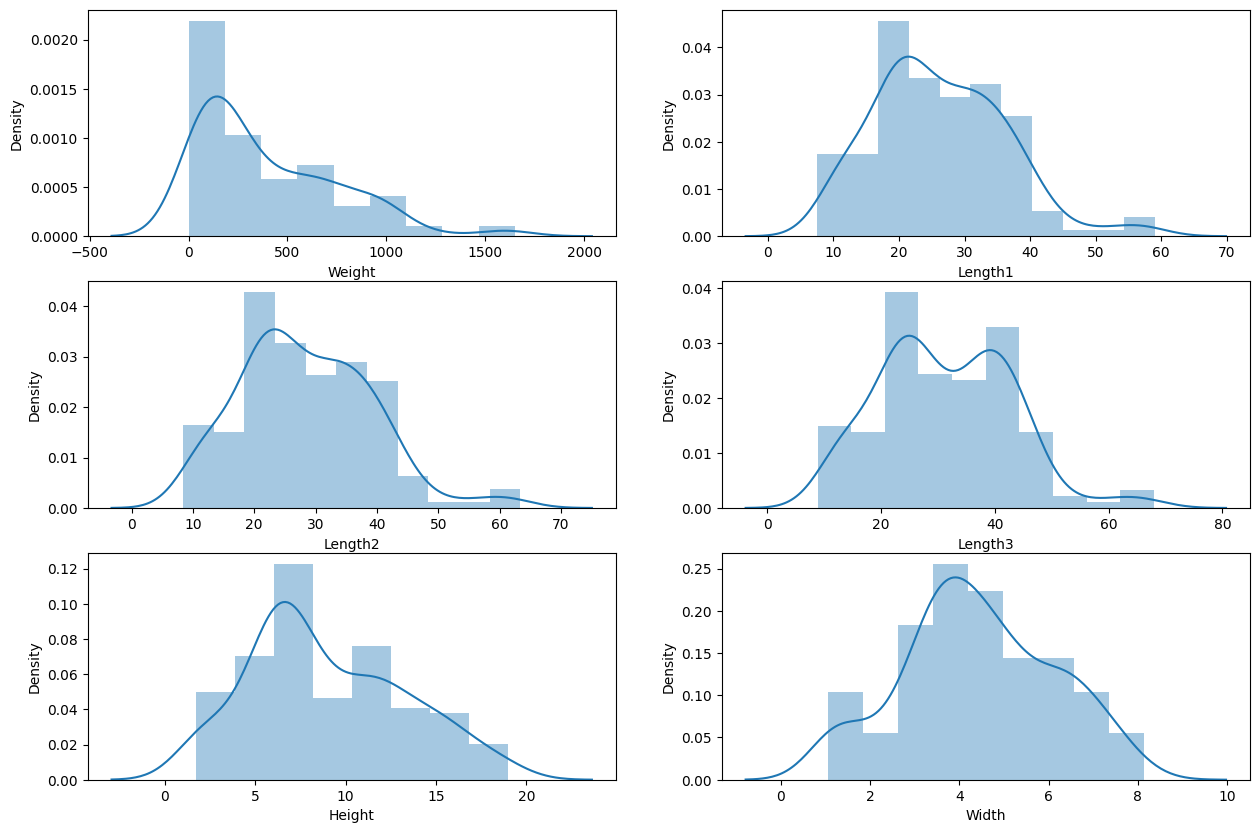

In [14]:
# cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.distplot(df["Weight"], ax=axes[0, 0])
sns.distplot(df["Length1"], ax=axes[0, 1])
sns.distplot(df["Length2"], ax=axes[1, 0])
sns.distplot(df["Length3"], ax=axes[1, 1])
sns.distplot(df["Height"], ax=axes[2, 0])
sns.distplot(df["Width"], ax=axes[2, 1])
plt.show()

Berdasarkan hasil plot di atas, dapat disimpulkan bahwa distribusi dari setiap variabel tidak sepenuhnya mengikuti pola distribusi normal. Pada variabel seperti **Weight**, terlihat adanya skewness positif yang signifikan, di mana banyak data terpusat di nilai rendah dengan ekor distribusi memanjang ke arah nilai tinggi. Variabel **Length1**, **Length2**, dan **Length3** menunjukkan pola yang lebih mendekati distribusi normal meskipun masih terdapat sedikit deviasi, seperti adanya puncak ganda atau distribusi yang condong. Variabel **Height** dan **Width** menunjukkan pola distribusi yang hampir simetris, tetapi masih ada sedikit deviasi pada bentuk kurva yang ideal. Hasil ini menunjukkan bahwa data mungkin memerlukan transformasi atau penyesuaian jika asumsi normalitas diperlukan untuk analisis statistik lebih lanjut.

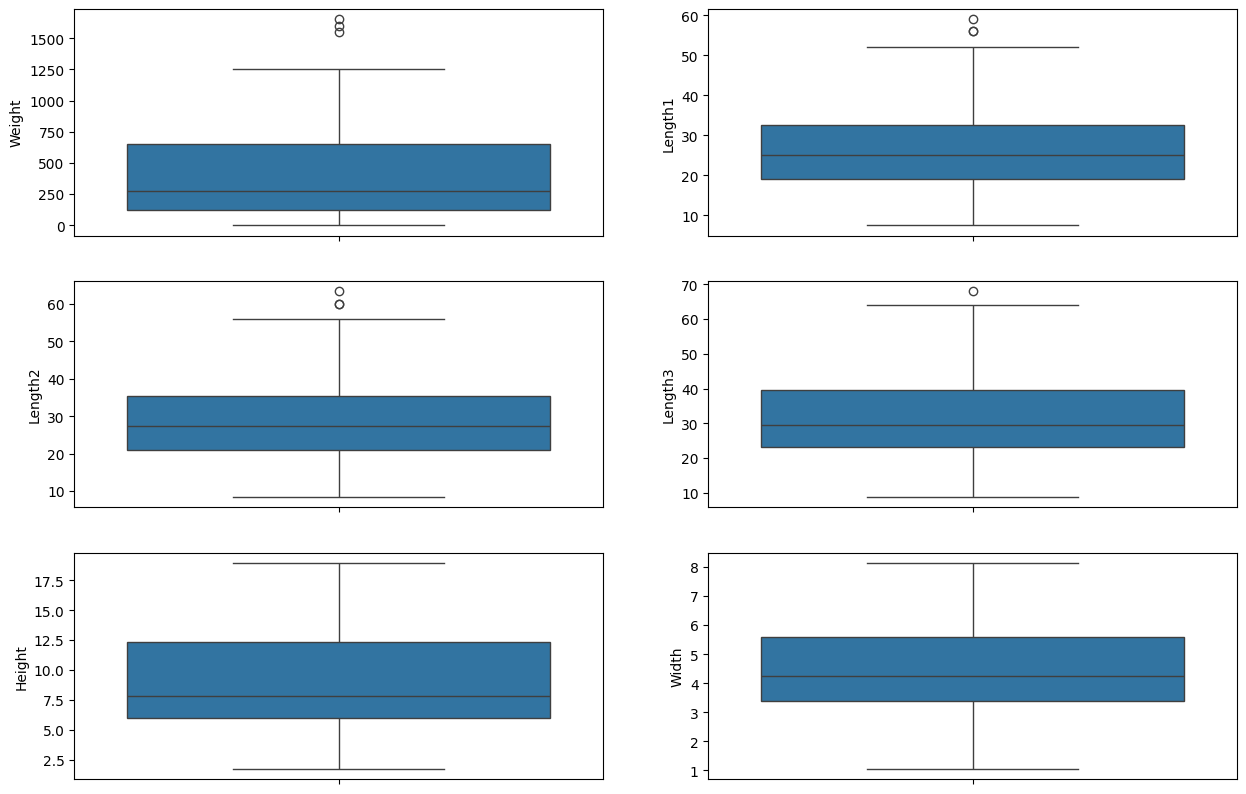

In [16]:
# cek normalitas data dengan boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot(df["Weight"], ax=axes[0, 0])
sns.boxplot(df["Length1"], ax=axes[0, 1])
sns.boxplot(df["Length2"], ax=axes[1, 0])
sns.boxplot(df["Length3"], ax=axes[1, 1])
sns.boxplot(df["Height"], ax=axes[2, 0])
sns.boxplot(df["Width"], ax=axes[2, 1])
plt.show()

Berdasarkan hasil boxplot di atas, dapat disimpulkan bahwa data untuk setiap variabel ikan menunjukkan adanya outlier pada beberapa variabel, seperti Weight, Length1, Length2, dan Length3, yang terlihat dari titik-titik data yang berada di luar batas whisker atas. Outlier ini mengindikasikan adanya pengamatan ekstrem yang dapat memengaruhi analisis statistik lebih lanjut, terutama jika menggunakan metode yang sensitif terhadap pencilan, seperti regresi linear atau uji t. Untuk variabel Height dan Width, distribusi data terlihat lebih simetris tanpa adanya outlier yang signifikan. Secara keseluruhan, pola distribusi data pada boxplot ini mengindikasikan bahwa meskipun sebagian besar data berada dalam rentang normal, perlu dilakukan pemeriksaan lebih lanjut, seperti transformasi data atau analisis robust, untuk menangani outlier dan memastikan hasil analisis yang lebih akurat.

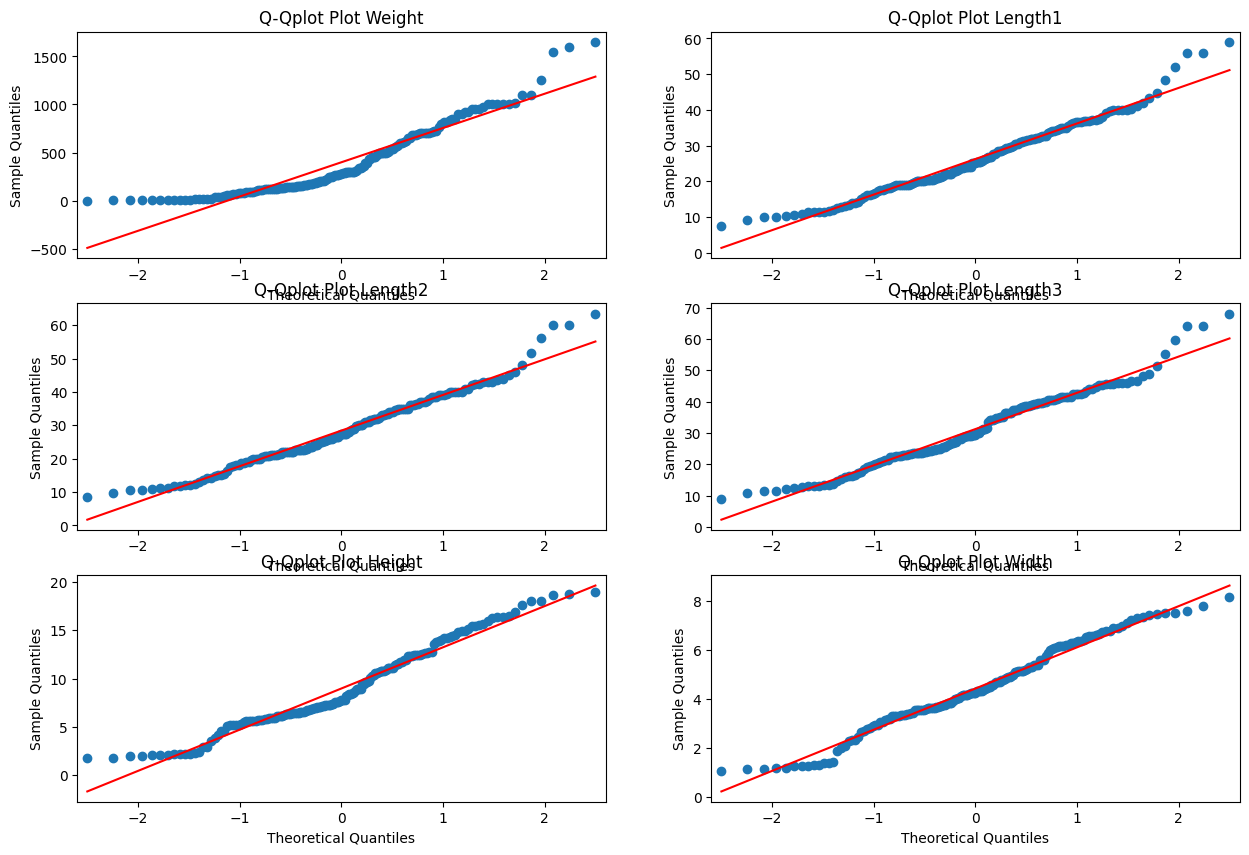

In [19]:
# cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sm.graphics.qqplot(df["Weight"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Weight')

sm.graphics.qqplot(df["Length1"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Length1')

sm.graphics.qqplot(df["Length2"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Length2')

sm.graphics.qqplot(df["Length3"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Length3')

sm.graphics.qqplot(df["Height"].dropna(), line='s', ax=axes[2, 0])
axes[2, 0].title.set_text('Q-Qplot Plot Height')

sm.graphics.qqplot(df["Width"].dropna(), line='s', ax=axes[2, 1])
axes[2, 1].title.set_text('Q-Qplot Plot Width')

plt.show()

#### Uji Normalitas Menggunakan Shapiro Wilk
H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [26]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Terima H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.883, p=0.000
Tolak H0, Weight tidak berdistribusi normal
Statistics=0.971, p=0.002
Tolak H0, Length1 tidak berdistribusi normal
Statistics=0.973, p=0.003
Tolak H0, Length2 tidak berdistribusi normal
Statistics=0.973, p=0.003
Tolak H0, Length3 tidak berdistribusi normal
Statistics=0.961, p=0.000
Tolak H0, Height tidak berdistribusi normal
Statistics=0.979, p=0.015
Tolak H0, Width tidak berdistribusi normal


#### Uji Linearitas
Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

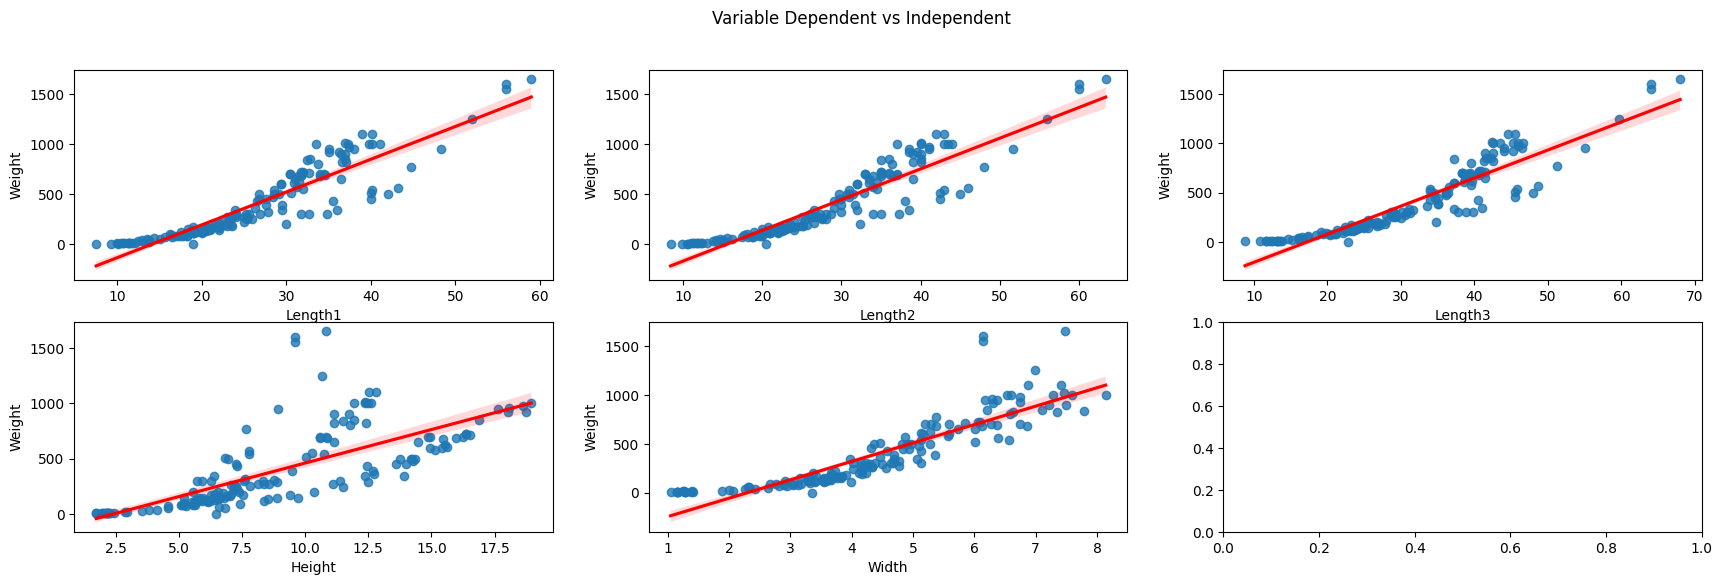

In [30]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(2, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Length1"], y=df["Weight"], line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=df["Length2"], y=df["Weight"], line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=df["Length3"], y=df["Weight"], line_kws={'color': 'red'}, ax=axes[0, 2])
sns.regplot(x=df["Height"], y=df["Weight"], line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=df["Width"], y=df["Weight"], line_kws={'color': 'red'}, ax=axes[1, 1])
plt.show()

#### Uji Multikolinearitas
Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda.

<Axes: >

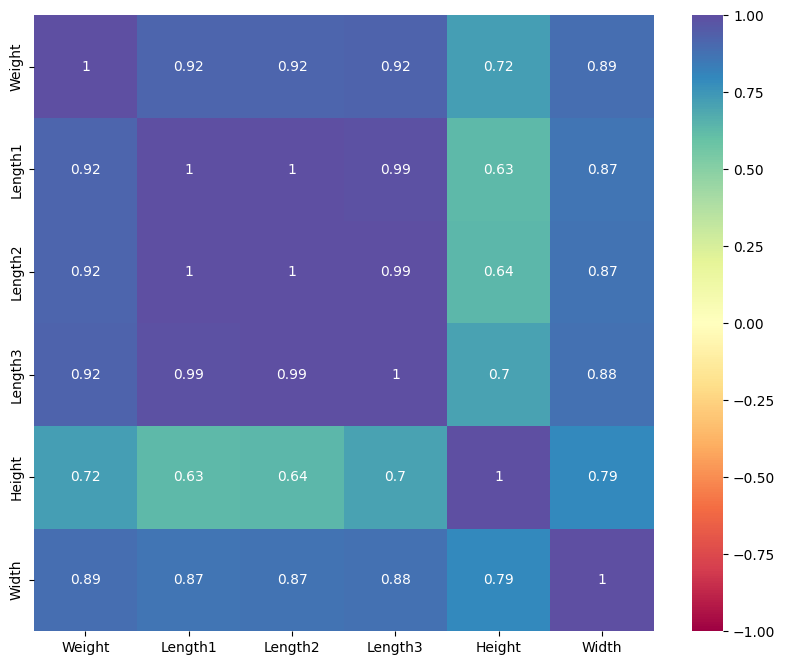

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [33]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Weight"].sort_values()
korelasi

Height     0.724345
Width      0.886507
Length1    0.915712
Length2    0.918618
Length3    0.923044
Weight     1.000000
Name: Weight, dtype: float64

Diperoleh:
- Nilai korelasi antara Height dengan Weight sebesar 0,724345.
- Nilai korelasi antara Width dengan Weight sebesar 0,886507.
- Nilai korelasi antara Length1 dengan Weight sebesar 0,915712.
- Nilai korelasi antara Length2 dengan Weight sebesar 0,918618.
- Nilai korelasi antara Length3 dengan Weight sebesar 0,923044.

Dari hasil tersebut, nilai korelasi antara beberapa variabel bebas dengan variabel Weight menunjukkan nilai korelasi yang cukup tinggi (di atas 0,7), terutama pada Length1, Length2, dan Length3, yang mendekati 1. Hal ini mengindikasikan adanya kemungkinan multikolinearitas di antara variabel bebas yang perlu ditinjau lebih lanjut, khususnya pada variabel-variabel dengan korelasi yang sangat tinggi terhadap Weight.

#### Scaling
Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [34]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-4.38072172e-01, -3.05788578e-01, -2.82303007e-01,
        -1.06020232e-01,  5.96578670e-01, -2.36528948e-01],
       [-3.03562184e-01, -2.25507242e-01, -1.98053663e-01,
        -2.33668373e-03,  8.21260549e-01, -6.65789457e-02],
       [-1.63447613e-01, -2.35542409e-01, -1.79331587e-01,
        -1.09769794e-02,  7.97341291e-01,  1.65793169e-01],
       [-9.89949100e-02,  5.30159764e-03,  5.46943678e-02,
         1.96390116e-01,  8.79771455e-01,  2.26210031e-02],
       [ 8.87586153e-02,  2.53719316e-02,  5.46943678e-02,
         2.39591594e-01,  8.12834979e-01,  4.26371272e-01],
       [ 1.44804444e-01,  5.54774324e-02,  1.20221635e-01,
         3.00073664e-01,  1.08395111e+00,  3.03431249e-01],
       [ 2.84919015e-01,  5.54774324e-02,  1.20221635e-01,
         2.82793073e-01,  1.21901769e+00,  5.12357880e-01],
       [-2.33330416e-02,  1.35758768e-01,  1.48304750e-01,
         3.25994551e-01,  8.65728838e-01,  1.62163285e-01],
       [ 1.44804444e-01,  1.35758768e-01,  1.483

In [35]:
# Membuat dataframe dari hasil scalling
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


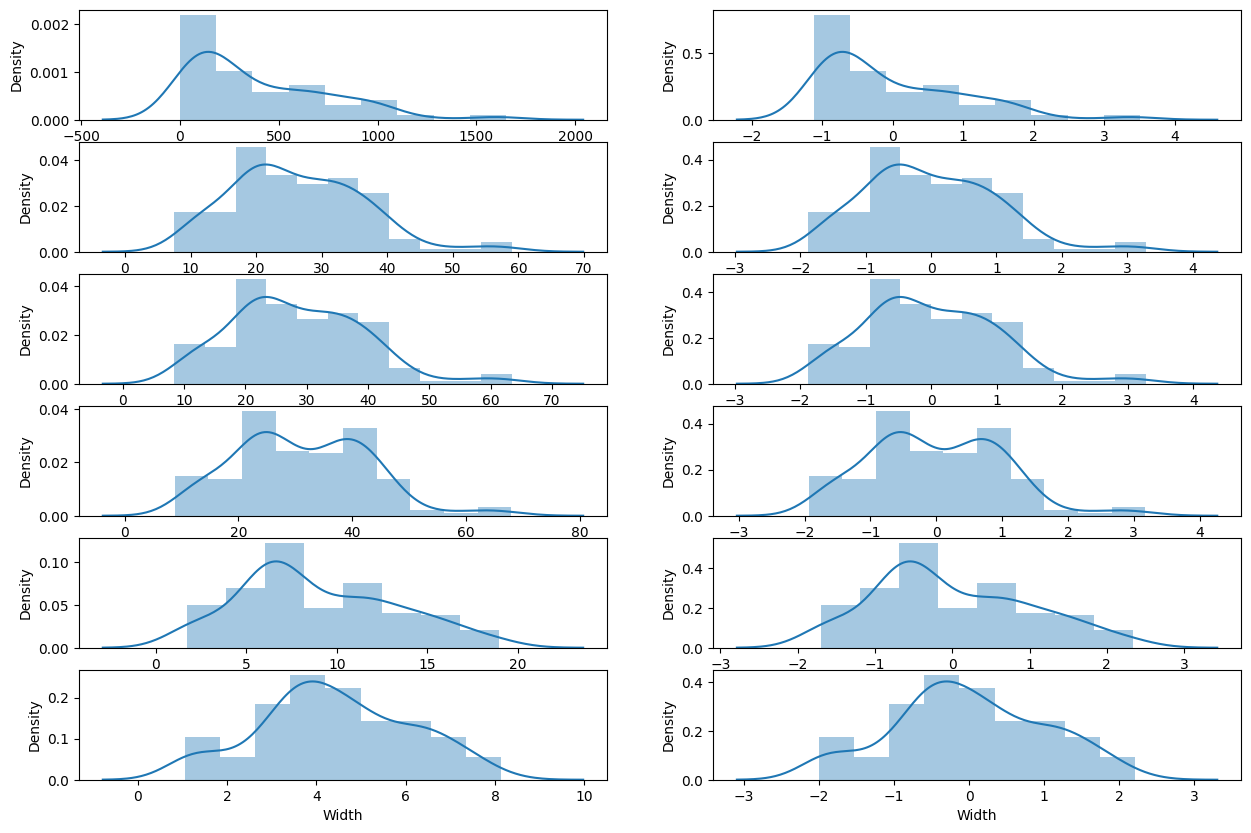

In [36]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(6, 2, figsize=(15, 10))

sns.distplot(df["Weight"], ax=axes[0, 0])
sns.distplot(scaled_df["Weight"], ax=axes[0, 1])
sns.distplot(df["Length1"], ax=axes[1, 0])
sns.distplot(scaled_df["Length1"], ax=axes[1, 1])
sns.distplot(df["Length2"], ax=axes[2, 0])
sns.distplot(scaled_df["Length2"], ax=axes[2, 1])
sns.distplot(df["Length3"], ax=axes[3, 0])
sns.distplot(scaled_df["Length3"], ax=axes[3, 1])
sns.distplot(df["Height"], ax=axes[4, 0])
sns.distplot(scaled_df["Height"], ax=axes[4, 1])
sns.distplot(df["Width"], ax=axes[5, 0])
sns.distplot(scaled_df["Width"], ax=axes[5, 1])
plt.show()

#### Membangun Model Regresi

#### Train Test Split
Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test.

In [37]:
X = scaled_df.drop("Weight", axis=1).values
y = scaled_df["Weight"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [38]:
print("Ukuran X train: ", len(X_train))
print("Ukuran X test : ", len(X_test))
print("Ukuran y train: ", len(y_train))
print("Ukuran y test : ", len(y_test))

Ukuran X train:  111
Ukuran X test :  48
Ukuran y train:  111
Ukuran y test :  48


#### Membangun model dengan package Statsmodels

In [39]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [40]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [41]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           3.79e-51
Time:                        21:43:54   Log-Likelihood:                -18.320
No. Observations:                 111   AIC:                             48.64
Df Residuals:                     105   BIC:                             64.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0101      0.028     -0.359      0.7

Dari output di atas, kita dapat melihat nilai-nilai berikut:

1. **Nilai p>|t|**:
   - Variabel independen dengan nilai p>|t| kurang dari 0,05 yaitu `x1`, `x4`, dan `x5`. Hal ini menunjukkan bahwa ketiga variabel tersebut memiliki pengaruh signifikan terhadap variabel dependen.
   - Variabel independen `x2` dan `x3` memiliki nilai p>|t| lebih besar dari 0,05, sehingga tidak berpengaruh signifikan terhadap variabel dependen.
   - Nilai p>|t| intercept sebesar 0,720 yang berarti intercept tidak signifikan dalam model ini.

2. **Nilai Coefficient (coef)**:
   - **Coef `x1`:** 3,2792 artinya, jika nilai `x1` bertambah satu satuan, maka variabel dependen (`y`) akan meningkat sebesar 3,2792 poin, dengan asumsi variabel lainnya tetap.
   - **Coef `x2`:** -1,6995 artinya, jika nilai `x2` bertambah satu satuan, maka variabel dependen (`y`) akan menurun sebesar 1,6995 poin, dengan asumsi variabel lainnya tetap.
   - **Coef `x3`:** -1,2564 artinya, jika nilai `x3` bertambah satu satuan, maka variabel dependen (`y`) akan menurun sebesar 1,2564 poin.
   - **Coef `x4`:** 0,4266 artinya, jika nilai `x4` bertambah satu satuan, maka variabel dependen (`y`) akan meningkat sebesar 0,4266 poin.
   - **Coef `x5`:** 0,2273 artinya, jika nilai `x5` bertambah satu satuan, maka variabel dependen (`y`) akan meningkat sebesar 0,2273 poin.

3. **Nilai R-squared dan Adjusted R-squared**:
   - **R-squared:** 0,901 menunjukkan bahwa 90,1% variasi dalam variabel dependen dapat dijelaskan oleh model regresi ini.
   - **Adjusted R-squared:** 0,897 menunjukkan nilai R-squared yang telah disesuaikan berdasarkan jumlah variabel independen dalam model.

4. **Nilai AIC dan BIC**:
   - **AIC:** 48,64 dan **BIC:** 64,90. Nilai ini digunakan untuk membandingkan beberapa model. Model dengan nilai AIC dan BIC yang lebih rendah lebih disukai.

5. **Nilai F-statistic**:
   - Nilai F-statistic sebesar 192,0 dengan Prob(F-statistic) sebesar 3,79e-51 menunjukkan bahwa model secara keseluruhan signifikan pada tingkat signifikansi 5%.

6. **Catatan Tambahan**:
   - Model memiliki nilai Durbin-Watson sebesar 1,613, yang dapat digunakan untuk mendeteksi adanya autokorelasi residual.
   - Berdasarkan Omnibus dan Jarque-Bera, model menunjukkan kemungkinan adanya penyimpangan dari normalitas pada residual.

Kesimpulan:
Model ini menjelaskan variabel dependen dengan baik (R-squared tinggi). Namun, beberapa variabel seperti `x2` dan `x3` tidak signifikan, sehingga dapat dipertimbangkan untuk dikeluarkan dari model.

In [42]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9014261773086572
adjusted coefficient of determination: 0.8967321857519266
regression coefficients: [-0.01006941  3.27923164 -1.69051769 -1.25640709  0.4265649   0.22728347]


In [43]:
# membuat list
list_columns = []

for i in df.columns:
  if i != "Weight":
    list_columns.append(i)

In [44]:
list_columns

['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [45]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_weight"] = y_test
df_statsmod["prediction_weight"] = prediction_1
df_statsmod.head()

,Length1,Length2,Length3,Height,Width,actual_weight,prediction_weight
0,0.135759,0.148305,0.325995,0.865729,0.162163,-0.023333,0.180968
1,-0.727266,-0.740994,-0.728122,-0.584125,-0.634269,-1.116227,-0.620787
2,-0.476386,-0.460163,-0.538035,-0.630980,-0.412073,-0.639837,-0.481158
3,-0.576738,-0.553773,-0.512114,-0.453481,-0.355363,-0.667860,-0.595948
4,0.577306,0.569551,0.455599,0.300865,1.172283,0.441847,0.742575


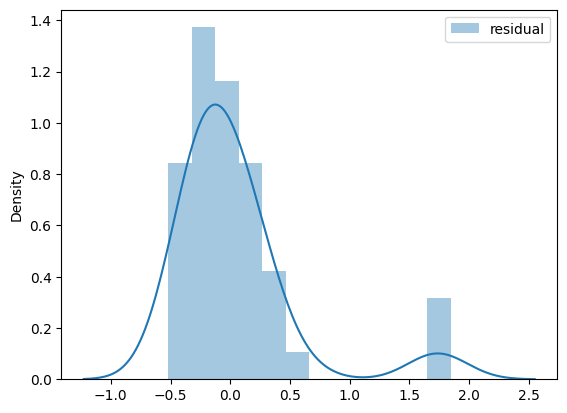

In [46]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_weight'] - df_statsmod['prediction_weight']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [47]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.726, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [48]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Length1,Length2,Length3,Height,Width,actual_weight,prediction_weight,residual
0,0.135759,0.148305,0.325995,0.865729,0.162163,-0.023333,0.180968,-0.204301
1,-0.727266,-0.740994,-0.728122,-0.584125,-0.634269,-1.116227,-0.620787,-0.495439
2,-0.476386,-0.460163,-0.538035,-0.630980,-0.412073,-0.639837,-0.481158,-0.158679
3,-0.576738,-0.553773,-0.512114,-0.453481,-0.355363,-0.667860,-0.595948,-0.071913
4,0.577306,0.569551,0.455599,0.300865,1.172283,0.441847,0.742575,-0.300728


Plot data actual dan prediction<br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut:

<function matplotlib.pyplot.show(close=None, block=None)>

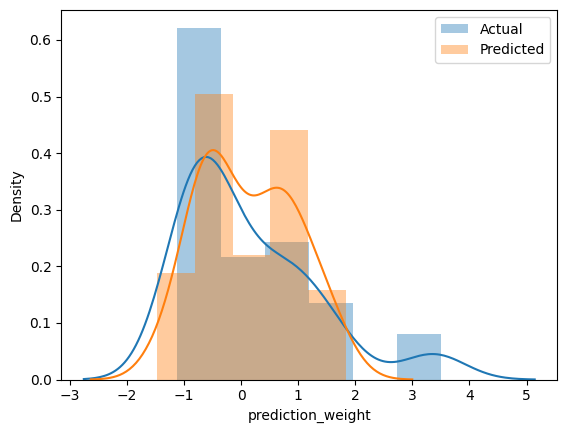

In [49]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_weight'], label="Actual")
sns.distplot(df_statsmod['prediction_weight'], label="Predicted")
plt.legend()
plt.show

#### Asumsi autokorelasi

In [50]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

np.float64(1.612616960138429)

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.

#### Uji Homoskedasitas
Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi.

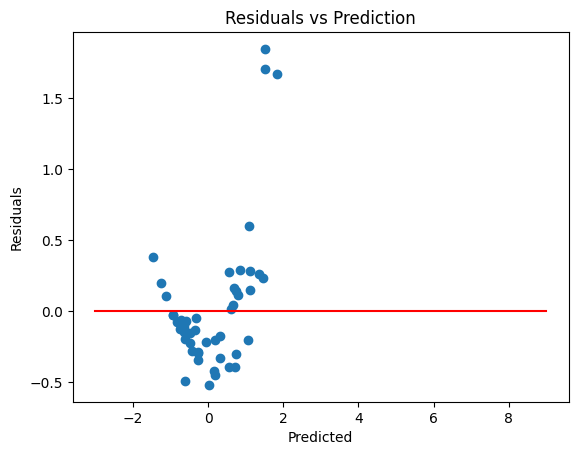

In [53]:
asm_homosk = plt.scatter(df_statsmod['prediction_weight'], df_statsmod["residual"])
plt.xlabel('Predicted')
plt.ylabel('Residuals')
sns.lineplot(x=[-3, 9], y=[0, 0], color='red')
plt.title('Residuals vs Prediction')
plt.show()

#### Evaluation Model

In [54]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_weight'], df_statsmod['prediction_weight']))

# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_weight'], df_statsmod['prediction_weight']))

R-square : 0.8136987517934354
MSE : 0.2552926345633615


#### Uji Partial Analisis Regresi
Uji Parameter T-test memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y).

In [55]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)

T-test score const:  -0.3594763133149387
T-test score X1:  2.8730448034631664
T-test score X2:  -1.3290876156041591
T-test score X3:  -2.222991923886528
T-test score X4:  4.058326025450131
T-test score X5:  2.3359965028313585


In [56]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)

P-value const:  0.7199607345609128
P-value X1:  0.004920342232460964
P-value X2:  0.18669987767937188
P-value X3:  0.028359510288244502
P-value X4:  9.530817632372246e-05
P-value X5:  0.021391078699975263


Berdasarkan hasil uji parsial analisis regresi, diketahui bahwa variabel X1, X3, X4, dan X5 memiliki P-value masing-masing sebesar 0.0049, 0.0283, 0.0001, dan 0.0213, yang semuanya lebih kecil dari 0,05. Hal ini menunjukkan bahwa keempat variabel tersebut secara parsial memberikan pengaruh yang signifikan terhadap variabel dependen Weight (Y). Sebaliknya, konstanta dan variabel X2 memiliki P-value sebesar 0.7199 dan 0.1667, yang lebih besar dari 0,05, sehingga dapat disimpulkan bahwa konstanta dan X2 tidak memberikan pengaruh signifikan terhadap variabel dependen Weight (Y). Dengan demikian, variabel independen yang secara signifikan memengaruhi variabel dependen adalah X1, X3, X4, dan X5.

**Uji kelayakan model F-test** memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak.

In [57]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  192.03830394967832
P-value :  3.785556878411463e-51
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null ditolak dan dapat disimpulkan bahwa model regresi dari ketiga variabel independen dan variabel dependen Weight (Y) layak digunakan.

#### Notes
* Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
* The residual error plot should be normally distributed.
* The mean of residual error should be 0 or close to 0 as much as possible
* Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
* Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
* Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
* Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.